# Introduction: Brain Stroke Analysis

A brain stroke is one of the leading causes of death and disability worldwide, impacting millions of lives each year. It occurs when blood flow to a part of the brain is interrupted or reduced, depriving brain tissue of essential nutrients and oxygen. Understanding the factors that contribute to strokes, such as age, lifestyle, and health conditions, is critical for early detection, prevention, and effective treatment.

This project delves to explore the patterns and risk factors associated with brain strokes. By leveraging data analysis and machine learning techniques, I aim to identify key trends, visualize significant relationships, and develop a predictive model for stroke occurrence.

With the help of Python and its powerful libraries, I analyze the data, uncover meaningful insights, and assess the accuracy of predictive modeling. This project serves as a step forward in raising awareness about stroke risk factors and showcasing the potential of data science in healthcare applications.

# Objectives of the Study

- To perform exploratory data analysis (EDA) by summarizing key statistics and visualizing relationships between variables such as age, gender, hypertension, average glucose level, and their correlation with stroke occurrences.

- To identify and address any missing or duplicate data, ensuring the dataset is clean and reliable for analysis.

- To analyze potential risk factors contributing to strokes, including the effects of hypertension, age, and average glucose levels, using both descriptive statistics and data visualizations.

- To develop a logistic regression model to predict the likelihood of a stroke based on selected features, evaluate the model's performance, and interpret the findings through metrics such as accuracy, confusion matrix, and classification report.

In [ ]:
## Importing Libraries
import pandas as pd  

import numpy as np

import matplotlib.pyplot as plt

from pandas import DataFrame, Series

import seaborn as sns

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.tools.tools import add_constant

 
# Dataset Overview


In [14]:
## Loading The Dataset
df = pd.read_csv("C:/Users/USER/Desktop/brain_stroke1.csv")

# Display the dataset

print(df)

      gender  age      hypertension  heart_disease  avg_glucose_level   bmi  \
0       Male   67  Not Hypertensive              1             228.69  36.6   
1       Male   80  Not Hypertensive              1             105.92  32.5   
2     Female   49  Not Hypertensive              0             171.23  34.4   
3     Female   79      Hypertensive              0             174.12  24.0   
4       Male   81  Not Hypertensive              0             186.21  29.0   
...      ...  ...               ...            ...                ...   ...   
3476    Male   41  Not Hypertensive              0              70.15  29.8   
3477    Male   40  Not Hypertensive              0             191.15  31.1   
3478  Female   45      Hypertensive              0              95.02  31.8   
3479    Male   40  Not Hypertensive              0              83.94  30.0   
3480  Female   80      Hypertensive              0              83.75  29.1   

       smoking_status  stroke  
0     formerly smok

In [15]:
## Data shape

print("The number for row:", df.shape[0])

print("The number for column:", df.shape[1])

The number for row: 3481
The number for column: 8


In [16]:
### Checking for data info


print("The data informations are:", df.info)

The data informations are: <bound method DataFrame.info of       gender  age      hypertension  heart_disease  avg_glucose_level   bmi  \
0       Male   67  Not Hypertensive              1             228.69  36.6   
1       Male   80  Not Hypertensive              1             105.92  32.5   
2     Female   49  Not Hypertensive              0             171.23  34.4   
3     Female   79      Hypertensive              0             174.12  24.0   
4       Male   81  Not Hypertensive              0             186.21  29.0   
...      ...  ...               ...            ...                ...   ...   
3476    Male   41  Not Hypertensive              0              70.15  29.8   
3477    Male   40  Not Hypertensive              0             191.15  31.1   
3478  Female   45      Hypertensive              0              95.02  31.8   
3479    Male   40  Not Hypertensive              0              83.94  30.0   
3480  Female   80      Hypertensive              0              83.75  2



# Checking for missing values



In [18]:
missing_values = df.isnull().sum()

#### Print the missing values for each column

print(missing_values)

#### Check if there are any missing values in the entire dataset

if missing_values.sum() == 0:
    print("No missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
No missing values in the dataset.


In [19]:
# Checking for duplicate values in my dataset

print(df.duplicated().sum())

0



### Descriptive Statistics


In [20]:
## Exploratory Data Analysis (EDA)  

print(df.describe().T)

                    count        mean        std    min    25%    50%     75%  \
age                3481.0   49.067509  18.894255  10.00  34.00  50.00   64.00   
heart_disease      3481.0    0.065211   0.246934   0.00   0.00   0.00    0.00   
avg_glucose_level  3481.0  108.769155  48.133475  55.12  77.45  92.49  116.25   
bmi                3481.0   29.808159   6.228310  14.10  25.30  29.10   33.50   
stroke             3481.0    0.057742   0.233288   0.00   0.00   0.00    0.00   

                      max  
age                 82.00  
heart_disease        1.00  
avg_glucose_level  271.74  
bmi                 48.90  
stroke               1.00  


In [21]:

print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')



# Visualizations

- Distribution of age by gender and stroke.
- Bar plot for avg_glucose_level by hypertension and stroke.
- Correlation heatmap.

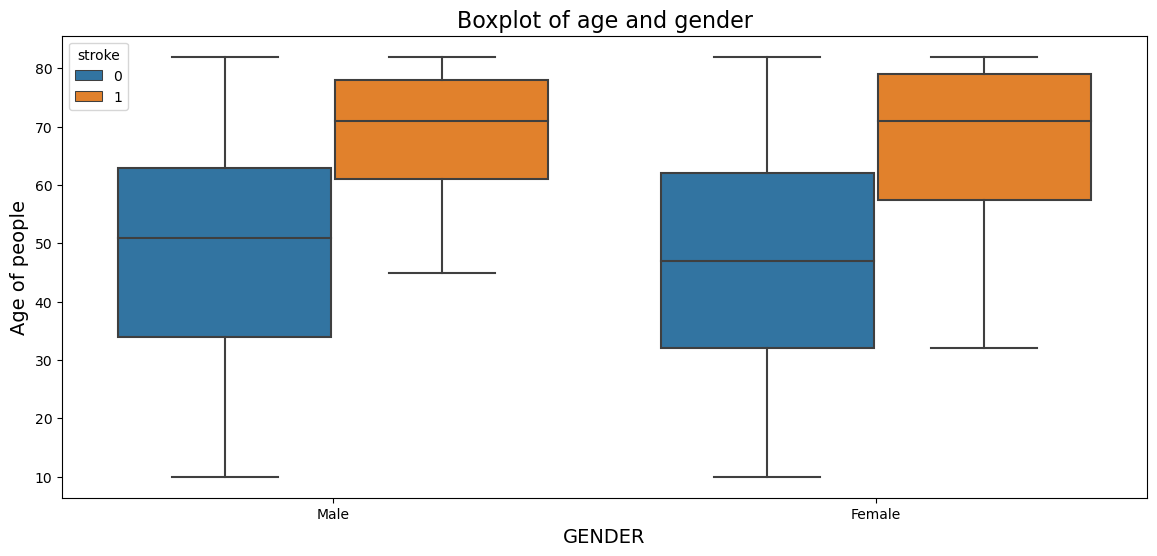

In [38]:
plt.figure(figsize=(14,6))
sns.boxplot(x= "gender", y= "age", hue= "stroke", data=df)
plt.xlabel("GENDER", fontsize= 14)
plt.ylabel("Age of people", fontsize=14)
plt.legend(title="stroke")
plt.title("Boxplot of age and gender", fontsize=16)
plt.show()



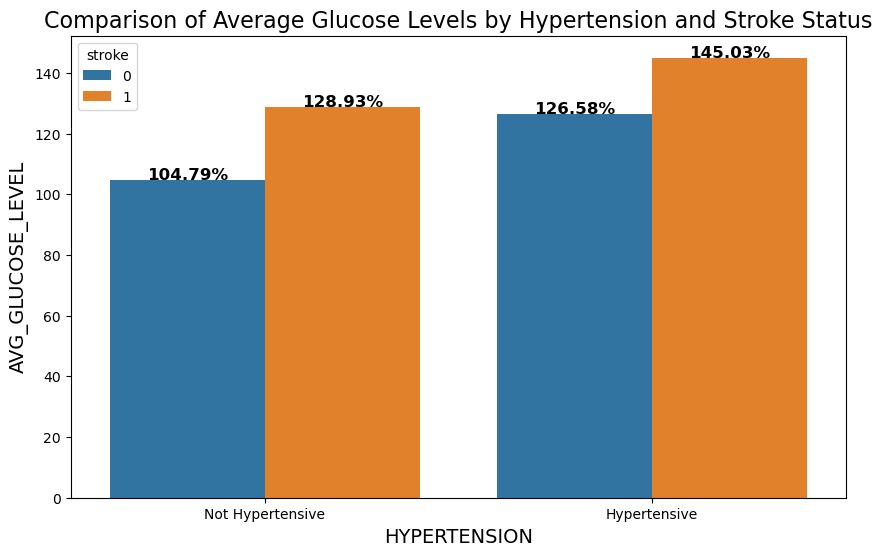

In [23]:

plt.figure(figsize=(10,6))

ax = sns.barplot(x="hypertension", y="avg_glucose_level", ci=None, hue="stroke", data=df)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='baseline', fontsize=12, fontweight='bold'
    )
plt.title("Comparison of Average Glucose Levels by Hypertension and Stroke Status", fontsize=16)
plt.xlabel("HYPERTENSION", fontsize=14)
plt.ylabel("AVG_GLUCOSE_LEVEL", fontsize=14)
plt.show()


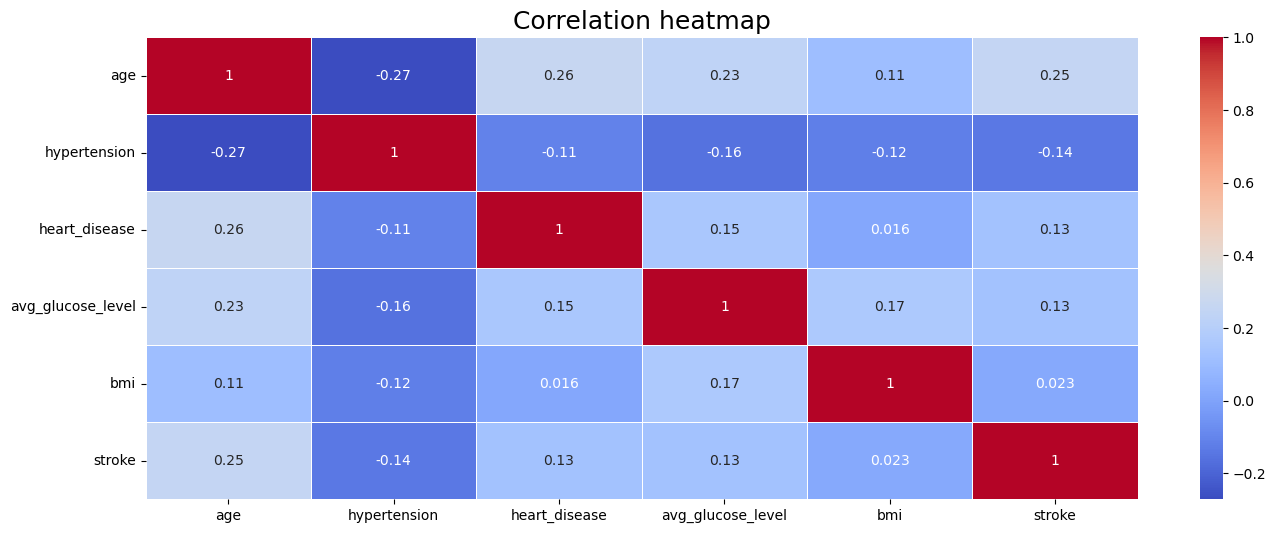

In [40]:
plt.figure(figsize=(16, 6)) 
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation heatmap", fontsize=18)
plt.show()


In [28]:

# Assuming `df` is the dataset
# Encode categorical variable
df['hypertension'] = df['hypertension'].astype('category').cat.codes

# Selecting features and target variable
X = df[['age', 'hypertension', 'avg_glucose_level', 'bmi']]
y = df['stroke']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make prediction
y_pred = model.predict(X_test)



# Model Building and Evaluation


In [29]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
target_names =['With brain stroke', 'Without brain stroke']

# Confusion Matrix and Classification Report

print(metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred,target_names = target_names))
X_train_sm = sm.add_constant(X_train)

#Fit the model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Summary of the logistic regression model

print(result.summary())

Accuracy: 0.9349282296650717
[[977   0]
 [ 68   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                       precision    recall  f1-score   support

   With brain stroke       0.93      1.00      0.97       977
Without brain stroke       0.00      0.00      0.00        68

            accuracy                           0.93      1045
           macro avg       0.47      0.50      0.48      1045
        weighted avg       0.87      0.93      0.90      1045

Optimization terminated successfully.
         Current function value: 0.177366
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 2436
Model:                          Logit   Df Residuals:                     2431
Method:                           MLE   Df Model:                            4
Date:                Sun, 22 Dec 2024   Pseudo R-squ.:                  0.1627
Time:                        13:50:27   Log-Likelihood:                -432.06
converged:               


# Interpretations, Conclusions, and Recommendations


## Interpretations

- The logistic regression results indicate that age is a significant predictor of stroke occurrence (p < 0.001), with a positive coefficient (0.0657). This suggests that as age increases, the likelihood of experiencing a stroke also increases.

- The average glucose level has a small but significant positive effect on stroke risk (p = 0.007), with a coefficient of 0.0043. This highlights that higher glucose levels might marginally increase the likelihood of a stroke.

- Body Mass Index (BMI) is not a significant predictor of stroke in this analysis (p = 0.420). This suggests that BMI alone may not directly correlate with stroke risk, or the relationship may require further investigation with more data or different modeling approaches.


## Conclusions

- Age is a critical risk factor for stroke, with older individuals showing a significantly higher risk.
- Hypertension has a complex association with stroke, which may depend on interactions with other health variables.
- Elevated average glucose levels are associated with a slight increase in stroke risk, underscoring the importance of managing blood sugar.
- BMI does not appear to be a significant predictor of stroke risk in this dataset, suggesting other health indicators might play a larger role.


## Recommendations


- Implement targeted screening programs for older populations, focusing on early detection of stroke risk factors.

- Regularly monitor and manage hypertension

- Maintain healthy blood sugar levels through diet, exercise, and regular check-ups, especially for individuals at higher risk.

### For Further Research

- Investigate the unexpected inverse relationship of hypertension with stroke in this adjusted model. This may involve exploring additional variables or larger datasets.

- Examine other potential risk factors, such as lifestyle habits and genetic predisposition, to better understand their role in stroke occurrence.
